In [2]:
from sympy import *

from sympy.matrices import Matrix
from sympy.interactive.printing import init_printing

init_printing(use_unicode=False, wrap_line=False)

ds, dr, h = symbols("ds, dr, h")
E, G, GIP, GIPs, GIPr = symbols('E, G, GIP, GIPs, GIPr')
EF, EFs, EFr = symbols('EF, EFs, EFr')
EI, EI3, EI2, EI2s, EI3s, EI2r, EI3r = symbols('EI, EI3, EI2, EI2s, EI3s, EI2r, EI3r')
fi = Symbol('fi')
L = Symbol('L')
Rx1, Rx2, Rx3 = symbols('Rx1, Rx2, Rx3')
Ry1, Ry2, Ry3 = symbols('Ry1, Ry2, Ry3')
M1, M2, M3    = symbols('M1, M2, M3')
Na, Nb, Nab   = symbols('Na, Nb, Nab')

SIN = Symbol("SIN")
COS = Symbol("COS")
TAN = Symbol("TAN")

l, l3, l2, l2s, l3s, l2r, l3r = symbols('l, l3, l2, l2s, l3s, l2r, l3r')
k, k3, k2, k2s, k3s, k2r, k3r = symbols("k, k3, k2, k2s, k3s, k2r, k3r")

K_inter = Matrix([
[ EF/L,                     0,                 0,      0,                    0,                    0, -EF/L,                 0,                 0,      0,                    0,                    0],  # tx1
[    0,      k2*(12*EI2)/L**3,                 0,      0,                    0,      k2*(6*EI2)/L**2,     0, -k2*(12*EI2)/L**3,                 0,      0,                    0,      k2*(6*EI2)/L**2],  # ty1
[    0,                     0,  k3*(12*EI3)/L**3,      0,     -k3*(6*EI3)/L**2,                    0,     0,                 0, -k3*(12*EI3)/L**3,      0,     -k3*(6*EI3)/L**2,                    0],  # tz1
[    0,                     0,                 0,  GIP/L,                    0,                    0,     0,                 0,                 0, -GIP/L,                    0,                    0],  # rx1
[    0,                     0,  -k3*(6*EI3)/L**2,      0, k3*((4+12*l3)*EI3)/L,                    0,     0,                 0,   k3*(6*EI3)/L**2,      0, k3*((2-12*l3)*EI3)/L,                    0],  # ry1
[    0,       k2*(6*EI2)/L**2,                 0,      0,                    0, k2*((4+12*l2)*EI2)/L,     0,  -k2*(6*EI2)/L**2,                 0,      0,                    0, k2*((2-12*l2)*EI2)/L],  # rz1
[-EF/L,                     0,                 0,      0,                    0,                    0,  EF/L,                 0,                 0,      0,                    0,                    0],  # tx2
[    0,     -k2*(12*EI2)/L**3,                 0,      0,                    0,     -k2*(6*EI2)/L**2,     0,  k2*(12*EI2)/L**3,                 0,      0,                    0,     -k2*(6*EI2)/L**2],  # ty2
[    0,                     0, -k3*(12*EI3)/L**3,      0,      k3*(6*EI3)/L**2,                    0,     0,                 0,  k3*(12*EI3)/L**3,      0,      k3*(6*EI3)/L**2,                    0],  # tz2
[    0,                     0,                 0, -GIP/L,                    0,                    0,     0,                 0,                 0,  GIP/L,                    0,                    0],  # rx2
[    0,                     0,  -k3*(6*EI3)/L**2,      0, k3*((2-12*l3)*EI3)/L,                    0,     0,                 0,   k3*(6*EI3)/L**2,      0, k3*((4+12*l3)*EI3)/L,                    0],  # ry2
[    0,       k2*(6*EI2)/L**2,                 0,      0,                    0, k2*((2-12*l2)*EI2)/L,     0,  -k2*(6*EI2)/L**2,                 0,      0,                    0, k2*((4+12*l2)*EI2)/L] ]) # rz3

K = K_inter

W = Symbol("W") #2*pi*R/ns/2
Ks  = K.subs( L, W/COS/2 ).subs(GIP, GIPs).subs(EF, EFs).subs(EI2,EI2s).subs(EI3,EI3s).subs(l3,l3s).subs(l2,l2s).subs(k2,k2s).subs(k3,k3s)  #.subs(EI1, E*ds**3*h/12)
Kk = K.subs( L, W ).subs(GIP, GIPr).subs(EF, EFr).subs(EI2, EI2r).subs(EI3, EI3r).subs(l3,l3r).subs(l2,l2r).subs(k3,k3r).subs(k2,k2r)  #.subs(EI2, E*dr**3*h/12) 

Ts1 = Matrix( [[  COS, -SIN,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
               [  SIN,  COS,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
               [    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
               [    0,    0,    0,  COS, -SIN,    0,    0,    0,    0,    0,    0,    0],
               [    0,    0,    0,  SIN,  COS,    0,    0,    0,    0,    0,    0,    0],
               [    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
               [    0,    0,    0,    0,    0,    0,  COS, -SIN,    0,    0,    0,    0],
               [    0,    0,    0,    0,    0,    0,  SIN,  COS,    0,    0,    0,    0],
               [    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
               [    0,    0,    0,    0,    0,    0,    0,    0,    0,  COS, -SIN,    0],
               [    0,    0,    0,    0,    0,    0,    0,    0,    0,  SIN,  COS,    0],
               [    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1]] )
               

Ks1 = Ts1 * Ks * Ts1.T
Ks2 = Ts1.T * Ks * Ts1
# Матрица связи
Z  = Matrix().zeros(12)

Kl =            Ks1.row_join(  Z  ).row_join(  Z  )
Kl = Kl.col_join( Z.row_join( Ks2 ).row_join(  Z  ) )
Kl = Kl.col_join( Z.row_join(  Z  ).row_join( Kk  ) )

Z = Matrix().zeros(6)
O = Matrix().eye(6)

A =             O.row_join( Z ).row_join( Z )
A = A.col_join( Z.row_join( O ).row_join( Z ))

A = A.col_join( Z.row_join( O ).row_join( Z ))
A = A.col_join( Z.row_join( Z ).row_join( O ))

A = A.col_join( O.row_join( Z ).row_join( Z ))
A = A.col_join( Z.row_join( Z ).row_join( O ))

Kglobal = simplify(A.transpose() * Kl * A)

###################################################################################################################################
Rx1, Ry1, Rz1, Mx1, My1, Mz1, Rx2, Ry2, Rz2, Mx2, My2, Mz2, Rx3, Ry3, Rz3, Mx3, My3, Mz3 = symbols('Rx1, Ry1, Rz1, Mx1, My1, Mz1, Rx2, Ry2, Rz2, Mx2, My2, Mz2, Rx3, Ry3, Rz3, Mx3, My3, Mz3')
tx1, ty1, tz1, rx1, ry1, rz1, tx2, ty2, tz2, rx2, ry2, rz2, tx3, ty3, tz3, rx3, ry3, rz3 = symbols('tx1, ty1, tz1, rx1, ry1, rz1, tx2, ty2, tz2, rx2, ry2, rz2, tx3, ty3, tz3, rx3, ry3, rz3')

In [3]:
K

C:\Users\HAXse\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\HAXse\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\HAXse\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\HAXse\AppData\Local\Pro

[ EF                                                                            -EF                                                                          ]
[ --        0            0         0            0                   0           ----       0            0         0            0                   0         ]
[ L                                                                              L                                                                           ]
[                                                                                                                                                            ]
[       12*EI2*k2                                                6*EI2*k2             -12*EI2*k2                                                6*EI2*k2     ]
[ 0     ---------        0         0            0                --------        0    -----------       0         0            0                --------     ]
[            3                                

In [4]:
S, C, T, c, R, ns, G12, G13, G23 = symbols("S, C, T, c, R, ns, G12, G13, G23")
def enplace1( arg ):
    res = simplify( arg.subs(k3r,1/(1 + 12*l3r)) )
    res = simplify( res.subs(k3s,1/(1 + 12*l3s)) )
    res = simplify( res.subs(k2r,1/(1 + 12*l2r)) )
    res = simplify( res.subs(k2s,1/(1 + 12*l2s)) )
    res = simplify( res.subs(l3s, EI3s/(c*G12*ds*h*(W/COS/2)**2)) ) 
    res = simplify( res.subs(l2s, EI2s/(c*G13*ds*h*(W/COS/2)**2)) )
    res = simplify( res.subs(l3r, EI3r/(c*G12*dr*h*(W)**2)) )
    res = simplify( res.subs(l2r, EI2r/(c*G13*dr*h*(W)**2)) )
    res = simplify( res.subs(SIN, sin(fi)) )
    res = simplify( res.subs(COS, cos(fi)) )
    res = simplify( res.subs(TAN, tan(fi)) )
    res = simplify( res.subs(EFs, E*ds*h) )
    res = simplify( res.subs(EFr, E*dr*h) )
    res = simplify( res.subs(EI3s, E*ds*h**3/12) )
    res = simplify( res.subs(EI3r, E*dr*h**3/12) )
    res = simplify( res.subs(EI2s, E*ds**3*h/12) )
    res = simplify( res.subs(EI2r, E*dr**3*h/12) )
    # res = simplify( res.subs(GIPs, G23*h**2*ds**2/4) )
    # res = simplify( res.subs(GIPr, G23*h**2*dr**2/4) )
    res = simplify( res.subs(W, 2*pi*R/ns/2) )
    return res


Kglobal * Matrix([tx1, ty1, tz1, rx1, ry1, rz1, tx2, ty2, tz2, rx2, ry2, rz2, tx3, ty3, tz3, rx3, ry3, rz3]) - Matrix([Rx1, Ry1, Rz1, Mx1, My1, Mz1, Rx2, Ry2, Rz2, Mx2, My2, Mz2, Rx3, Ry3, Rz3, Mx3, My3, Mz3])

[                                                   3     /     2              2    \         2                          2                         2         /        2                 2\        2         /      2                 2\                       /      3         2        2 /     3          \\                                             ]
[                                              2*COS *tx2*\EFs*W  + 48*EI2s*SIN *k2s/   24*COS *EI2s*SIN*k2s*rz1   24*COS *EI2s*SIN*k2s*rz2   2*COS *SIN*ty1*\- 48*COS *EI2s*k2s + EFs*W /   2*COS *SIN*ty2*\48*COS *EI2s*k2s - EFs*W /   EFr*tx3         tx1*\96*COS *EI2s*SIN *k2s + W *\2*COS *EFs + EFr//                                             ]
[                                            - -------------------------------------- - ------------------------ - ------------------------ + -------------------------------------------- + ------------------------------------------ - ------- - Rx1 + ---------------------------------------------------   

# Ma = D11*ka1 + D12*kb1

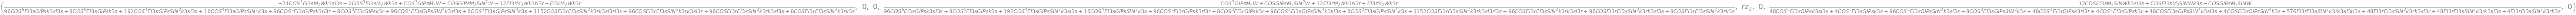

In [5]:
F = Matrix( [Rx1, Ry1, Rz1,-M2/2,   0,   0,   0,   0, Rz2,  M2,   0,   0,   0, Ry3, Rz3,  -M2/2,   0,   0] )
U = Matrix( [  0,   0,   0,  rx1, ry1, rz1, tx2, ty2,   0, rx2, ry2, rz2, tx3,   0,   0,    rx3, ry3, rz3] ) 
Sys = simplify(( Matrix([Kglobal * U - F]) ).subs(rz2, 0).subs(Rx1, 0).subs(Ry1, 0).subs(Ry3, 0).subs(Rz1, -Rz2/2).subs(Rz3, -Rz2/2).subs(tx2, tx3/2).subs(rz1, -rz3).subs(rx3,rx1).subs(ry1, -ry3).subs(ry2, 0))
S = (Sys[0], Sys[1], Sys[2], Sys[3], Sys[4], Sys[5], Sys[7], Sys[8], Sys[9], Sys[12], Sys[13], Sys[14], Sys[15], Sys[16], Sys[17] )
Res1 = ( linsolve( S, rx1, ty2, Rz2, rx2, rz2, tx3, ry3, rz3) )
Res = Res1.args[0]
Res

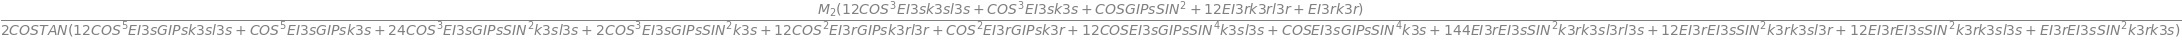

In [6]:
var = [rx1, ty2, Rz2, rx2, rz2, tx3, ry3, rz3]
ka1 = (Res[var.index(rx2)] - Res[var.index(rx1)]) / (W * TAN / 2)
simplify(ka1)

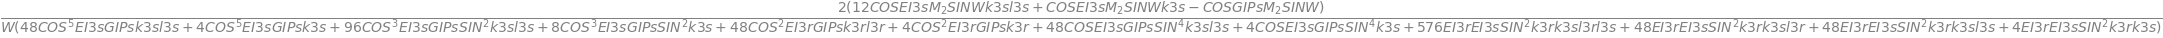

In [7]:
kb1 = 2 * Res[var.index(ry3)] / W
kb1

# Mb = D12ka2 + D22kb2

In [8]:
F = Matrix( [Rx1, Ry1, Rz1,    0, -M2,   0,   0,   0,   0,   0,   0,   0,   0, Ry3, Rz3,      0,  M2,   0] )
U = Matrix( [  0,   0,   0,  rx1, ry1, rz1, tx2, ty2, tz2, rx2, ry2, rz2, tx3,   0,   0,    rx3, ry3, rz3] )
Sys = (( Matrix([Kglobal * U - F]) ).subs(Rx1, 0).subs(Ry3, -Ry1).subs(Rz3, -Rz1).subs(tx2, tx3/2).subs(ry2, 0).subs(rx3,rx1).subs(rz2,0).subs(rz3,-rz1))
simplify(Sys)

[                                                             2                         2 /          /     2              2    \             /      2                 2\\        2                                                         ]
[                                                     - 24*COS *EI2s*SIN*W*k2s*rz1 + COS *\- COS*tx3*\EFs*W  + 48*EI2s*SIN *k2s/ + 2*SIN*ty2*\48*COS *EI2s*k2s - EFs*W // - EFr*W *tx3                                                     ]
[                                                     --------------------------------------------------------------------------------------------------------------------------------                                                     ]
[                                                                                                                     3                                                                                                                    ]
[                                                   

In [9]:
# S = (Sys[0], Sys[1], Sys[2], Sys[3], Sys[4], Sys[5], Sys[7], Sys[8], Sys[9], Sys[10], Sys[12], Sys[13], Sys[14], Sys[15], Sys[16], Sys[17] )
# Res22 = solve( S, Ry1, Rz1, rx1, ry1, rz1, ty2, tz2, rx2, tx3, ry3)
# Res22

In [10]:
# S = (Sys[0], Sys[1], Sys[2], Sys[3], Sys[4], Sys[5], Sys[7], Sys[8], Sys[9], Sys[10], Sys[12], Sys[13], Sys[14], Sys[15], Sys[16], Sys[17] )
Sys2 = (Sys.subs(Ry1,0).subs(Rz1,0).subs(rz1,0).subs(ty2,0).subs(tx3,0).subs(tz2,0))
# S2 = (Sys2[2], Sys2[3], Sys2[4], Sys2[9], Sys2[10], Sys2[8], Sys2[9], Sys2[10], Sys2[14], Sys2[15], Sys2[16] )
# S2 = (Sys2[2], Sys2[3], Sys2[4], Sys2[9], Sys2[10] )
S2 = (Sys2[8], Sys2[9], Sys2[10],  Sys2[14], Sys2[15], Sys2[16] )
Sys2

[                                                                                                        0                                                                                                        ]
[                                                                                                                                                                                                                 ]
[                                                                                                        0                                                                                                        ]
[                                                                                                                                                                                                                 ]
[                                                         2                          2                                         /      3                 

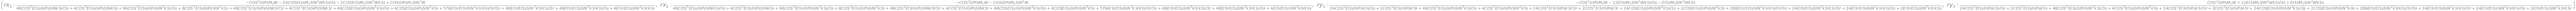

In [11]:
Res2 = solve( S2, rx1, ry1, rx2, ry3)
Res2

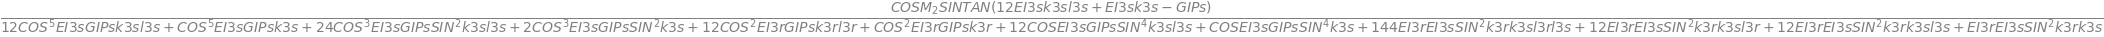

In [12]:
ka2 = (Res2[rx2] - Res2[rx1]) / (W / TAN / 2)
simplify(ka2)


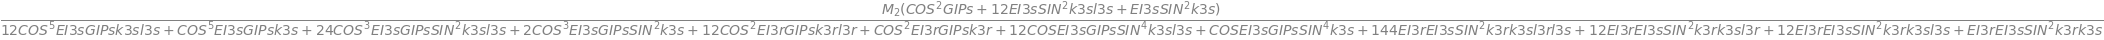

In [13]:
kb2 = (Res2[ry3] - Res2[ry1]) / W
simplify(kb2)

# D11 D12 D21 D22




In [14]:
D11, D12, D21, D22 = symbols('D11, D12, D21, D22')
Ka1, Ka2, Kb1, Kb2 = symbols('Ka1, Ka2, Kb1, Kb2')

SysD = simplify((D11*Ka1 + D12*Kb1 - M2, D21*Ka1 + D22*Kb1, D11*Ka2 + D12*Kb2, D21*Ka2 + D22*Kb2 - M2))
SysD

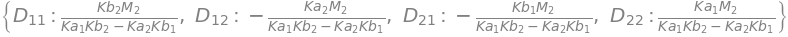

In [15]:
resD = solve(SysD, D11, D12, D21, D22)
resD

In [22]:
S, C, T, c, R, ns, G12, G13, G23 = symbols("S, C, T, c, R, ns, G12, G13, G23")
def enplace1( arg ):
    res = simplify( arg.subs(k3r,1/(1 + 12*l3r)) )
    res = simplify( res.subs(k3s,1/(1 + 12*l3s)) )
    res = simplify( res.subs(k2r,1/(1 + 12*l2r)) )
    res = simplify( res.subs(k2s,1/(1 + 12*l2s)) )
    res = simplify( res.subs(l3s, EI3s/(c*G12*ds*h*(W/COS/2)**2)) ) 
    res = simplify( res.subs(l2s, EI2s/(c*G13*ds*h*(W/COS/2)**2)) )
    res = simplify( res.subs(l3r, EI3r/(c*G12*dr*h*(W)**2)) )
    res = simplify( res.subs(l2r, EI2r/(c*G13*dr*h*(W)**2)) )
    res = simplify( res.subs(SIN, sin(fi)) )
    res = simplify( res.subs(COS, cos(fi)) )
    res = simplify( res.subs(TAN, tan(fi)) )
    res = simplify( res.subs(EFs, E*ds*h) )
    res = simplify( res.subs(EFr, E*dr*h) )
    res = simplify( res.subs(EI3s, E*ds*h**3/12) )
    res = simplify( res.subs(EI3r, E*dr*h**3/12) )
    res = simplify( res.subs(EI2s, E*ds**3*h/12) )
    res = simplify( res.subs(EI2r, E*dr**3*h/12) )
    # res = simplify( res.subs(GIPs, G23*h**2*ds**2/4) )
    # res = simplify( res.subs(GIPr, G23*h**2*dr**2/4) )
    res = simplify( res.subs(W, 2*pi*R/ns/2) )
    return res

In [17]:
print(simplify(resD[D11].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

2*COS*TAN*(COS**2*GIPs + 12*EI3s*SIN**2*k3s*l3s + EI3s*SIN**2*k3s)*(12*COS**5*EI3s*GIPs*k3s*l3s + COS**5*EI3s*GIPs*k3s + 24*COS**3*EI3s*GIPs*SIN**2*k3s*l3s + 2*COS**3*EI3s*GIPs*SIN**2*k3s + 12*COS**2*EI3r*GIPs*k3r*l3r + COS**2*EI3r*GIPs*k3r + 12*COS*EI3s*GIPs*SIN**4*k3s*l3s + COS*EI3s*GIPs*SIN**4*k3s + 144*EI3r*EI3s*SIN**2*k3r*k3s*l3r*l3s + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3r + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3s + EI3r*EI3s*SIN**2*k3r*k3s)/(-COS**3*SIN**2*TAN**2*(12*EI3s*k3s*l3s + EI3s*k3s - GIPs)**2 + (COS**2*GIPs + 12*EI3s*SIN**2*k3s*l3s + EI3s*SIN**2*k3s)*(12*COS**3*EI3s*k3s*l3s + COS**3*EI3s*k3s + COS*GIPs*SIN**2 + 12*EI3r*k3r*l3r + EI3r*k3r))


In [18]:
print(simplify(resD[D12].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

2*COS**2*SIN*TAN**2*(-12*EI3s*k3s*l3s - EI3s*k3s + GIPs)*(12*COS**5*EI3s*GIPs*k3s*l3s + COS**5*EI3s*GIPs*k3s + 24*COS**3*EI3s*GIPs*SIN**2*k3s*l3s + 2*COS**3*EI3s*GIPs*SIN**2*k3s + 12*COS**2*EI3r*GIPs*k3r*l3r + COS**2*EI3r*GIPs*k3r + 12*COS*EI3s*GIPs*SIN**4*k3s*l3s + COS*EI3s*GIPs*SIN**4*k3s + 144*EI3r*EI3s*SIN**2*k3r*k3s*l3r*l3s + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3r + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3s + EI3r*EI3s*SIN**2*k3r*k3s)/(-COS**3*SIN**2*TAN**2*(12*EI3s*k3s*l3s + EI3s*k3s - GIPs)**2 + (COS**2*GIPs + 12*EI3s*SIN**2*k3s*l3s + EI3s*SIN**2*k3s)*(12*COS**3*EI3s*k3s*l3s + COS**3*EI3s*k3s + COS*GIPs*SIN**2 + 12*EI3r*k3r*l3r + EI3r*k3r))


In [19]:
print(simplify(resD[D21].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

COS**2*SIN*TAN*(12*EI3s*k3s*l3s + EI3s*k3s - GIPs)*(12*COS**5*EI3s*GIPs*k3s*l3s + COS**5*EI3s*GIPs*k3s + 24*COS**3*EI3s*GIPs*SIN**2*k3s*l3s + 2*COS**3*EI3s*GIPs*SIN**2*k3s + 12*COS**2*EI3r*GIPs*k3r*l3r + COS**2*EI3r*GIPs*k3r + 12*COS*EI3s*GIPs*SIN**4*k3s*l3s + COS*EI3s*GIPs*SIN**4*k3s + 144*EI3r*EI3s*SIN**2*k3r*k3s*l3r*l3s + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3r + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3s + EI3r*EI3s*SIN**2*k3r*k3s)/(COS**3*SIN**2*TAN**2*(12*EI3s*k3s*l3s + EI3s*k3s - GIPs)**2 - (COS**2*GIPs + 12*EI3s*SIN**2*k3s*l3s + EI3s*SIN**2*k3s)*(12*COS**3*EI3s*k3s*l3s + COS**3*EI3s*k3s + COS*GIPs*SIN**2 + 12*EI3r*k3r*l3r + EI3r*k3r))


In [20]:
print(simplify(resD[D22].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

(12*COS**3*EI3s*k3s*l3s + COS**3*EI3s*k3s + COS*GIPs*SIN**2 + 12*EI3r*k3r*l3r + EI3r*k3r)*(12*COS**5*EI3s*GIPs*k3s*l3s + COS**5*EI3s*GIPs*k3s + 24*COS**3*EI3s*GIPs*SIN**2*k3s*l3s + 2*COS**3*EI3s*GIPs*SIN**2*k3s + 12*COS**2*EI3r*GIPs*k3r*l3r + COS**2*EI3r*GIPs*k3r + 12*COS*EI3s*GIPs*SIN**4*k3s*l3s + COS*EI3s*GIPs*SIN**4*k3s + 144*EI3r*EI3s*SIN**2*k3r*k3s*l3r*l3s + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3r + 12*EI3r*EI3s*SIN**2*k3r*k3s*l3s + EI3r*EI3s*SIN**2*k3r*k3s)/(-COS**3*SIN**2*TAN**2*(12*EI3s*k3s*l3s + EI3s*k3s - GIPs)**2 + (COS**2*GIPs + 12*EI3s*SIN**2*k3s*l3s + EI3s*SIN**2*k3s)*(12*COS**3*EI3s*k3s*l3s + COS**3*EI3s*k3s + COS*GIPs*SIN**2 + 12*EI3r*k3r*l3r + EI3r*k3r))


In [23]:
print(enplace1(resD[D11].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

E*ds*h**3*(4*E**2*dr*h**2*sin(fi)**4 - 3*E*G23*dr*ds*h*(cos(4*fi) - 1) + 12*E*G23*ds**2*h*sin(fi)**6*cos(fi) + 24*E*G23*ds**2*h*sin(fi)**4*cos(fi)**3 + 12*E*G23*ds**2*h*sin(fi)**2*cos(fi)**5 + 36*G23**2*dr*ds**2*cos(fi)**4 + 36*G23**2*ds**3*sin(fi)**4*cos(fi)**3 + 72*G23**2*ds**3*sin(fi)**2*cos(fi)**5 + 36*G23**2*ds**3*cos(fi)**7)*cos(fi)*tan(fi)/(24*(E**2*dr*h**2*sin(fi)**2 - E**2*ds*h**2*sin(fi)**4*cos(fi) + E**2*ds*h**2*sin(fi)**2*cos(fi)**3 + 3*E*G23*dr*ds*h*cos(fi)**2 + 9*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 3*E*G23*ds**2*h*cos(fi)**5 - 9*G23**2*ds**3*sin(fi)**4*cos(fi) + 9*G23**2*ds**3*sin(fi)**2*cos(fi)**3))


In [24]:
print(enplace1(resD[D12].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

E*ds*h**3*(-E**2*dr*h**2*sin(fi)**2 + 6*E*G23*dr*ds*h*sin(fi)**2 - 3*E*G23*dr*ds*h - 3*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 3*E*G23*ds**2*h*cos(fi)**5 - 6*E*G23*ds**2*h*cos(fi)**3 - 9*G23**2*dr*ds**2*sin(fi)**2 + 9*G23**2*dr*ds**2 + 9*G23**2*ds**3*sin(fi)**4*cos(fi) - 9*G23**2*ds**3*cos(fi)**5 + 18*G23**2*ds**3*cos(fi)**3)*sin(fi)**3/(6*(E**2*dr*h**2*sin(fi)**2 - E**2*ds*h**2*sin(fi)**4*cos(fi) + E**2*ds*h**2*sin(fi)**2*cos(fi)**3 - 3*E*G23*dr*ds*h*sin(fi)**2 + 3*E*G23*dr*ds*h + 9*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 3*E*G23*ds**2*h*cos(fi)**5 - 9*G23**2*ds**3*sin(fi)**4*cos(fi) + 9*G23**2*ds**3*sin(fi)**2*cos(fi)**3))


In [25]:
print(enplace1(resD[D21].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

E*ds*h**3*(-E**2*dr*h**2*sin(fi)**2 + 6*E*G23*dr*ds*h*sin(fi)**2 - 3*E*G23*dr*ds*h - 3*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 3*E*G23*ds**2*h*cos(fi)**5 - 6*E*G23*ds**2*h*cos(fi)**3 - 9*G23**2*dr*ds**2*sin(fi)**2 + 9*G23**2*dr*ds**2 + 9*G23**2*ds**3*sin(fi)**4*cos(fi) - 9*G23**2*ds**3*cos(fi)**5 + 18*G23**2*ds**3*cos(fi)**3)*sin(fi)**2*cos(fi)/(12*(E**2*dr*h**2*sin(fi)**2 - E**2*ds*h**2*sin(fi)**4*cos(fi) + E**2*ds*h**2*sin(fi)**2*cos(fi)**3 - 3*E*G23*dr*ds*h*sin(fi)**2 + 3*E*G23*dr*ds*h + 9*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 3*E*G23*ds**2*h*cos(fi)**5 - 9*G23**2*ds**3*sin(fi)**4*cos(fi) + 9*G23**2*ds**3*sin(fi)**2*cos(fi)**3))


In [26]:
print(enplace1(resD[D22].subs(Kb2, kb2).subs(Ka2, ka2).subs(Ka1, ka1).subs(Kb1, kb1)))

E*h**3*(-E**2*dr**2*h**2*cos(fi)**2 + E**2*dr**2*h**2 - E**2*dr*ds*h**2*cos(fi)**5 + E**2*dr*ds*h**2*cos(fi)**3 + 3*E*G23*dr**2*ds*h*cos(fi)**2 + 6*E*G23*dr*ds**2*h*cos(fi)**5 - 6*E*G23*dr*ds**2*h*cos(fi)**3 + 6*E*G23*dr*ds**2*h*cos(fi) + 3*E*G23*ds**3*h*cos(fi)**4 - 9*G23**2*dr*ds**3*cos(fi)**5 + 9*G23**2*dr*ds**3*cos(fi)**3 - 9*G23**2*ds**4*cos(fi)**4 + 9*G23**2*ds**4*cos(fi)**2)/(12*(E**2*dr*h**2*sin(fi)**2 - 2*E**2*ds*h**2*cos(fi)**5 + 3*E**2*ds*h**2*cos(fi)**3 - E**2*ds*h**2*cos(fi) - 3*E*G23*dr*ds*h*sin(fi)**2 + 3*E*G23*dr*ds*h + 3*E*G23*ds**2*h*sin(fi)**4*cos(fi) + 9*E*G23*ds**2*h*cos(fi)**5 - 12*E*G23*ds**2*h*cos(fi)**3 + 6*E*G23*ds**2*h*cos(fi) - 18*G23**2*ds**3*cos(fi)**5 + 27*G23**2*ds**3*cos(fi)**3 - 9*G23**2*ds**3*cos(fi)))
